# What Q value should I use?

I often get asked "What Q value should I use?" when making a Q-transform plot of a gravitational wave signal.  There's no single right answer, but we can make some hand-wavey estimates to understand what this number means, and a rough idea of what values it should take.

## Estimating the right Q-value

$Q$ reflexts how many cycles a signal stays at a given frequency value.  We can estimate it like this:

 * $Q$ The number of cycles in a given frequency bin
 * $\Delta f$ The width of the frequency bin
 * $\varepsilon$ The fractional width of the frequency bin, e.g. $\varepsilon = \Delta f / f$
 * $\tau$ The time to change frequency bins
 
 Then:
 
 $$\Delta f = \dot{f} \tau   $$
 
$$ \tau = \Delta f / \dot{f} = \varepsilon f / \dot{f} $$

$$ Q = \tau f $$

$$ Q = \frac{\varepsilon f^2}{\dot{f}} $$


We can then use equation (7) from the "Basic Physics of GW150914" [paper](https://arxiv.org/abs/1608.01940) to relate $f$ and $\dot{f}$

This, and a little algebra, gets us to:

$$
Q = \varepsilon \times (\alpha / M)^{5/3}  \times f^{-5/3}
$$

where:
 * $M$ is the chirp mass of the system
 * $\alpha$ is a constant, defined below as the variable `alpha`
 
 The frequency should be the frequency we are interested in looking at, typically in the most sensitve band of the detector.  For LIGO, this should be $f \sim 150$ Hz
 
 $\varepsilon$ is a little tough to pin down - it depends on the details of the plot being made.  But, a reasonable binning might have frequency bins that are around 10% of the frequency, so $\varepsilon \sim 0.1$

In [1]:
c = 3e8
G = 6.6e-11
pi = 3.14
sun = 2e30
epsilon = 0.2

alpha = (c**3 / G)*(pi**-(8/5))*((5/96)**(3/5))
print(alpha)
print (alpha/sun)

1.1136575212367828e+34
5568.287606183914


In [2]:
# -- Import some python libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
mass_sol = np.arange(1,28)
mass = mass_sol*sun
print(mass)

[2.0e+30 4.0e+30 6.0e+30 8.0e+30 1.0e+31 1.2e+31 1.4e+31 1.6e+31 1.8e+31
 2.0e+31 2.2e+31 2.4e+31 2.6e+31 2.8e+31 3.0e+31 3.2e+31 3.4e+31 3.6e+31
 3.8e+31 4.0e+31 4.2e+31 4.4e+31 4.6e+31 4.8e+31 5.0e+31 5.2e+31 5.4e+31]


In [4]:
freq = 100
Q = epsilon * (alpha/mass)**(5/3)*(freq**(-5/3))

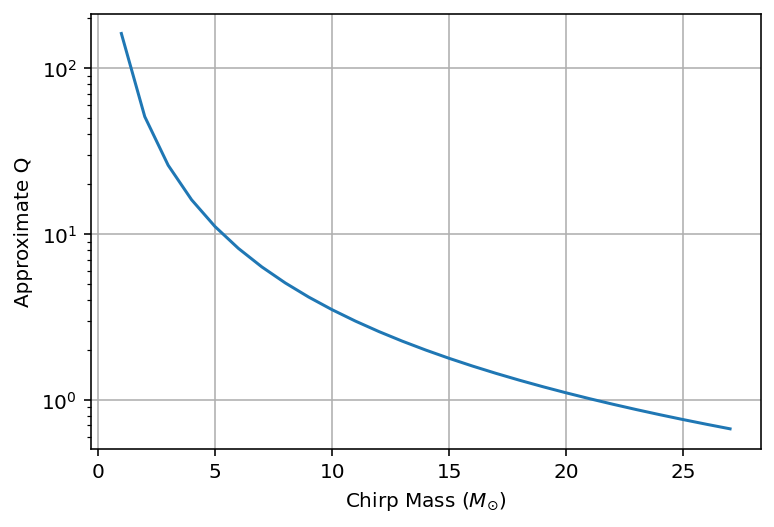

In [5]:
plt.semilogy(mass_sol, Q)
plt.xlabel('Chirp Mass ($M_{\odot})$')
plt.ylabel('Approximate Q')
plt.grid()